# Core Operations: Pixel Manipulation and ROI

This notebook explores fundamental, low-level operations in OpenCV. We will learn how to access and manipulate individual pixel values and how to work with a 'Region of Interest' (ROI).

### Table of Contents

This notebook covers the following core operations:
- [Step 1: Setup](#Step-1:-Setup)
- [Step 2: Accessing Individual Pixel Values](#Step-2:-Accessing-Individual-Pixel-Values)
- [Step 3: Modifying Pixel Values](#Step-3:-Modifying-Pixel-Values)
- [Step 4: Region of Interest (ROI)](#Step-4:-Region-of-Interest-(ROI))

### Step 1: Setup

First, we import the necessary libraries and define the path to our shared assets folder.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

### Step 2: Accessing Individual Pixel Values

Images loaded in OpenCV are NumPy arrays. You can access the color value of a specific pixel by using its row and column coordinates.

Remember: OpenCV loads color images in **BGR (Blue, Green, Red)** order by default.

In [2]:
root = os.getcwd()
img_path = os.path.join(root,'..' ,'_assets' ,'basketball.jpg')
image = cv2.imread(img_path)

if image is not None:
    pixel_value = image[100, 100]    
    print(f"Image Shape: {image.shape}")
    print(f"BGR value at (100, 100): {pixel_value}")
else:
    print(f"Error: Could not load image from {img_path}")

Image Shape: (1275, 1920, 3)
BGR value at (100, 100): [32 36 37]


In [5]:
def readAndWritePixelRegion():
    root = os.getcwd()
    imagePath = os.path.join(root, '..', '_assets', 'cat_seriho.jpg')
    if not os.path.exists(imagePath):
        raise FileNotFoundError(f"Image file not found at path: {imagePath}")
    img = cv2.imread(imagePath)
    if img is None:
        raise Exception("Failed to read image from file")
    
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgModified = imgRGB.copy()


    y_min, y_max = 220, 300
    x_min, x_max = 260, 360
    eyeRegion = imgRGB[y_min:y_max, x_min:x_max]

    height = y_max - y_min  # Yüksekliği (40 piksel)
    width = x_max - x_min   # Genişliği (60 piksel)
    print(f"Eye region dimensions: {width}x{height}")

    StartX = 310
    StartY = 160
    imgModified[StartY:StartY+height, StartX:StartX+width] = eyeRegion

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(imgRGB)
    axes[0].set_title('Original Image')

    axes[1].imshow(imgModified)
    axes[1].set_title('Modified Image')

    plt.show()

Eye region dimensions: 100x80


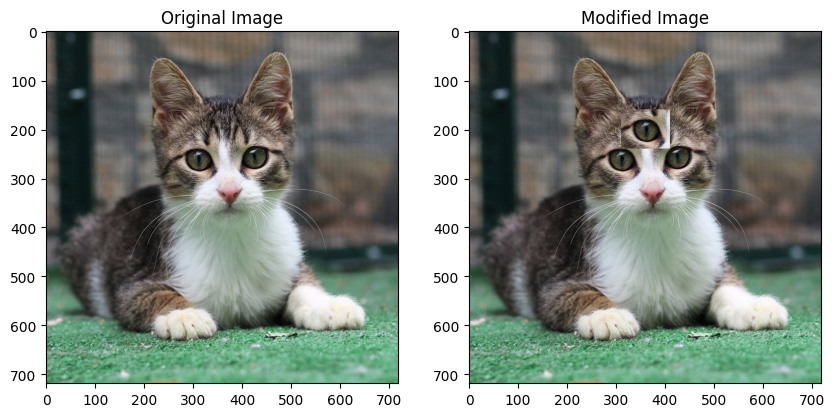

In [6]:
if __name__ == "__main__":
    readAndWritePixelRegion()

### Step 3: Modifying Pixel Values

Just as you can access a pixel's value, you can also change it by assigning a new value to that coordinate.

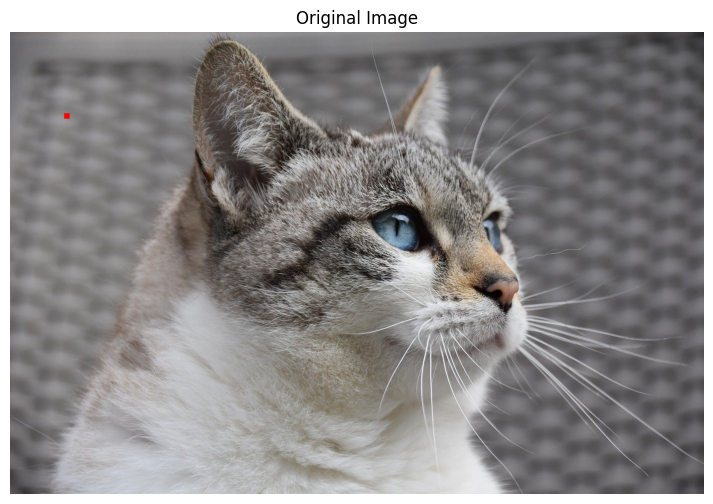

In [18]:
root = os.getcwd()
img_path = os.path.join(root, '..', '_assets', 'cat.jpg')

image = cv2.imread(img_path)

if image is not None:
    image[150:160, 100:110] = [0, 0, 255] 
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6)) 
    plt.imshow(image_rgb)        
    plt.title("Original Image")  
    plt.axis("off")              
    plt.show()                  

else:
    print(f"HATA: Resim yüklenemedi! Yol: {img_path}")

In [19]:
def process_image_regions():
    root = os.getcwd()
    img_path = os.path.join(root, '..', '_assets', 'cat_seriho.jpg')
    
    if not os.path.exists(img_path):
        print(f"HATA: Dosya bulunamadı: {img_path}")
        return

    img = cv2.imread(img_path)
    if img is None:
        print("HATA: Resim okunamadı.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_modified = img_rgb.copy()

    y_min, y_max = 220, 300
    x_min, x_max = 260, 360
    
    img_modified[y_min:y_max, x_min:x_max] = [255, 0, 0]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img_rgb)
    axes[0].set_title("Orijinal Resim")
    axes[0].axis('off')

    axes[1].imshow(img_modified)
    axes[1].set_title("Kirmizi Boyali Goz")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

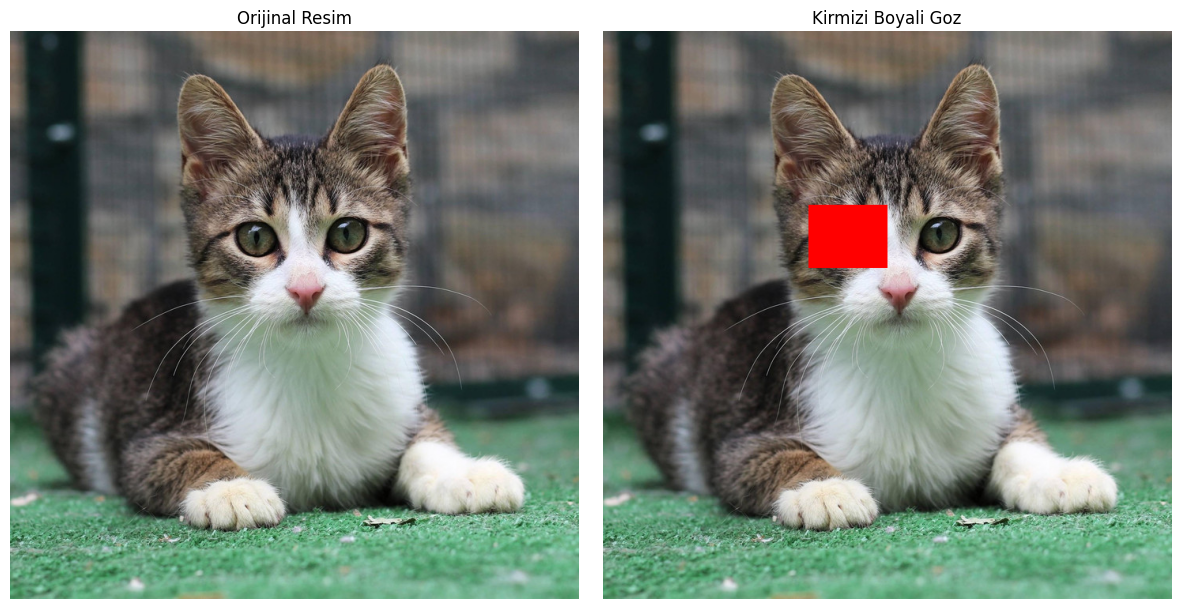

In [20]:
if __name__ == "__main__":
    process_image_regions()

### Step 4: Region of Interest (ROI)

An ROI is a rectangular area of an image you want to work on. Using NumPy's array slicing, you can easily select and manipulate these regions.

The slicing format is `image[startY:endY, startX:endX]`.

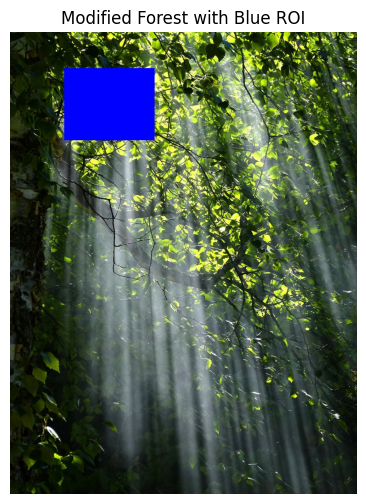

In [21]:

root = os.getcwd()
img_path = os.path.join(root, '..', '_assets', 'forest.jpg')

if not os.path.exists(img_path):
    raise FileNotFoundError(f"file coulnt founded {img_path}")

image = cv2.imread(img_path)

if image is None:
    raise KeyError("Error occurred")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

roi = image_rgb[100:300, 150:400]
roi[:] = [0, 0, 255]

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Modified Forest with Blue ROI")
plt.axis('off')
plt.show()